In [26]:
import pandas as pd

# Replace 'your_file.csv' with the actual file path or URL of your CSV file
file_path = 'C:/DEV/DATASETS/100STYLE_Preprocessed/seq_in_2.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, nrows=2000)

# Display the first few rows of the DataFrame
df.head()

,seq_id,root_pos_x_0,root_pos_y_0,root_fwd_x_0,root_fwd_y_0,root_vel_x_0,root_vel_y_0,root_speed_0,root_pos_x_1,root_pos_y_1,...,jpos_x_EndSite_LeftToe,jpos_y_EndSite_LeftToe,jpos_z_EndSite_LeftToe,jrot_x_EndSite_LeftToe,jrot_y_EndSite_LeftToe,jrot_z_EndSite_LeftToe,jrot_W_EndSite_LeftToe,jvel_x_EndSite_LeftToe,jvel_y_EndSite_LeftToe,jvel_z_EndSite_LeftToe
0,2,-0.480444,1.38537,-0.027664,0.999617,-74.775700,22.812600,97.328900,-0.410246,1.18516,...,38.8472,-92.8452,-12.6023,0.085340,-0.909890,-0.031847,0.404725,0.399933,0.219359,-0.240951
1,2,-0.515687,1.45671,-0.028392,0.999597,0.043597,-0.115700,0.131219,-0.444309,1.25672,...,38.8945,-92.5465,-13.4723,0.091325,-0.921992,-0.034830,0.374670,0.530137,0.271426,-0.350860
2,2,-0.557438,1.53465,-0.029390,0.999568,0.044392,-0.115632,0.131215,-0.479219,1.31822,...,38.8147,-92.2538,-14.5609,0.099572,-0.934755,-0.036997,0.339043,0.611973,0.289089,-0.482444
3,2,-0.604741,1.59386,-0.030486,0.999535,0.048759,-0.124934,0.142377,-0.517429,1.35230,...,38.4799,-92.1449,-15.6953,0.101450,-0.945531,-0.037417,0.307049,0.565120,0.207337,-0.648492
4,2,-0.657411,1.62587,-0.031626,0.999500,0.054566,-0.139163,0.159217,-0.562776,1.36801,...,37.8523,-92.2888,-16.8557,0.091645,-0.954478,-0.035049,0.281681,0.499415,0.083048,-0.830978


In [27]:
import plotly.express as px
import plotly.graph_objects as go


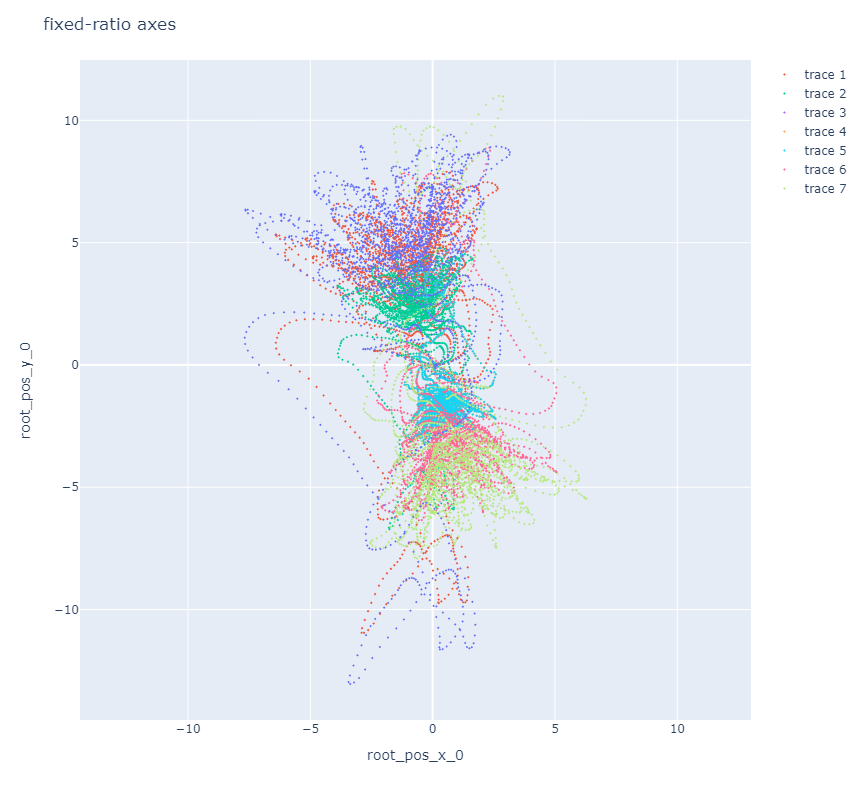

In [25]:
fig = px.scatter(df, x="root_pos_x_0", y="root_pos_y_0")
fig.add_scatter(x=df['root_pos_x_1'], y=df['root_pos_y_1'], mode="markers")
fig.add_scatter(x=df['root_pos_x_3'], y=df['root_pos_y_3'], mode="markers")
fig.add_scatter(x=df['root_pos_x_6'], y=df['root_pos_y_6'], mode="markers")
fig.add_scatter(x=df['root_pos_x_8'], y=df['root_pos_y_8'], mode="markers")
fig.add_scatter(x=df['root_pos_x_8'], y=df['root_pos_y_8'], mode="markers")
fig.add_scatter(x=df['root_pos_x_10'], y=df['root_pos_y_10'], mode="markers")
fig.add_scatter(x=df['root_pos_x_11'], y=df['root_pos_y_11'], mode="markers")

fig.update_traces(
    marker=dict(size=2, symbol="diamond"),
    selector=dict(mode="markers"),
)
fig.update_layout(
    width = 800,
    height = 800,
    title = "fixed-ratio axes"
)
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )

fig.show()

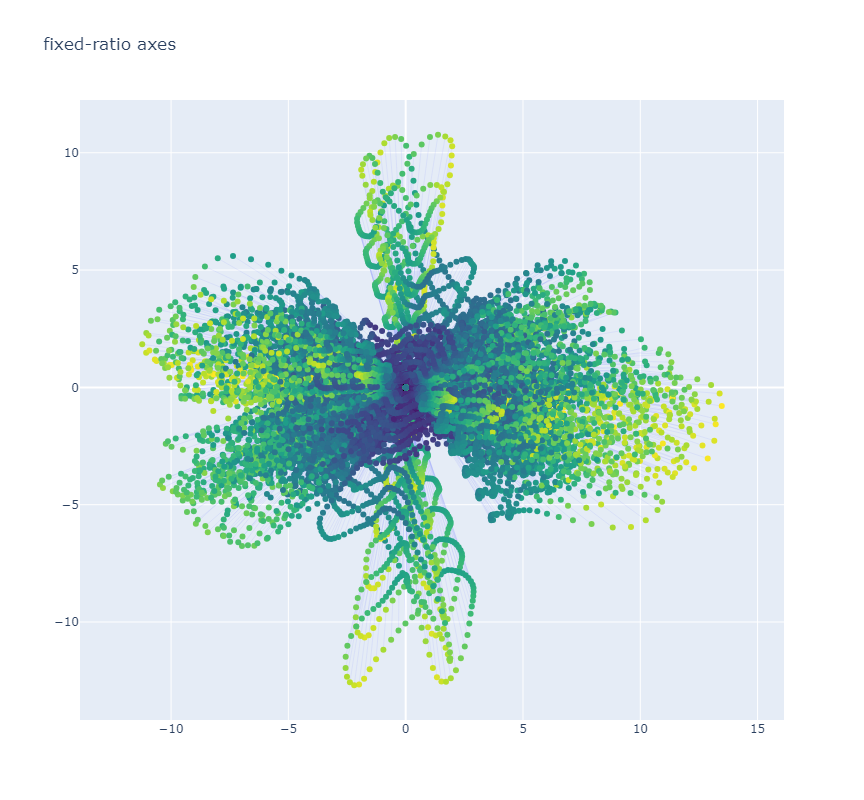

In [61]:
red_x = []
red_y = []
c = []
fig = go.Figure()
for idx, row in df.iterrows():
    _x = [row["root_pos_x_0"],
          row["root_pos_x_1"],
          row["root_pos_x_2"],
          row["root_pos_x_3"],
          row["root_pos_x_4"],
          row["root_pos_x_5"],
          row["root_pos_x_6"],
          row["root_pos_x_7"],
          row["root_pos_x_8"],
          row["root_pos_x_9"],
          row["root_pos_x_10"],
          row["root_pos_x_11"]
         ]
    _y = [row["root_pos_y_0"],
          row["root_pos_y_1"],
          row["root_pos_y_2"],
          row["root_pos_y_3"],
          row["root_pos_y_4"],
          row["root_pos_y_5"],
          row["root_pos_y_6"],
          row["root_pos_y_7"],
          row["root_pos_y_8"],
          row["root_pos_y_9"],
          row["root_pos_y_10"],
          row["root_pos_y_11"]
         ]
    
    
    [red_x.append(x) for x in _x]
    [red_y.append(y) for y in _y]
    [c.append(row["root_speed_5"]) for y in _y]
    
    red_x.append(None) # to separate lines, or they will be connected
    red_y.append(None) # for each adjacent row
    c.append(0)
    
    
fig.add_trace(
    go.Scatter(
        x=red_x,
        y=red_y,
        line=dict(
            width=0.1),
        marker=dict(
             color=c, #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        ),
        mode="lines+markers",

    )
)

fig.update_layout(
    width = 800,
    height = 800,
    title = "fixed-ratio axes"
)
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )


In [65]:
df_row = df.iloc[1500]
df_row

seq_id                    1.000000
root_pos_x_0             -4.620520
root_pos_y_0             -2.843230
root_fwd_x_0             -0.061555
root_fwd_y_0              0.998104
                            ...   
jrot_z_EndSite_LeftToe    0.095410
jrot_W_EndSite_LeftToe   -0.887674
jvel_x_EndSite_LeftToe    2.549110
jvel_y_EndSite_LeftToe    0.247208
jvel_z_EndSite_LeftToe    0.843973
Name: 1500, Length: 365, dtype: float64

In [66]:
pos_x = [df_row[f"root_pos_x_{i}"]  for i in range(12)]
pos_y = [df_row[f"root_pos_y_{i}"] for i in range(12)]

vel_x = [df_row[f"root_vel_x_{i}"] for i in range(12)]
vel_y = [df_row[f"root_vel_y_{i}"] for i in range(12)]

fwd_x = [df_row[f"root_fwd_x_{i}"] for i in range(12)]
fwd_y = [df_row[f"root_fwd_y_{i}"] for i in range(12)]

plt_velo_x = []
plt_velo_y = []

plt_fwd_x = []
plt_fwd_y = []

#Generate Velocity Indicator
for i in range(12):
    plt_velo_x.append(pos_x[i])
    plt_velo_y.append(pos_y[i])
    plt_fwd_x.append(pos_x[i])
    plt_fwd_y.append(pos_y[i])
    
    plt_velo_x.append(pos_x[i]+vel_x[i])
    plt_velo_y.append(pos_y[i]+vel_y[i])

    plt_fwd_x.append(pos_x[i]+fwd_x[i])
    plt_fwd_y.append(pos_y[i]+fwd_y[i])

    plt_velo_x.append(None)
    plt_velo_y.append(None)
    plt_fwd_x.append(None)
    plt_fwd_y.append(None)



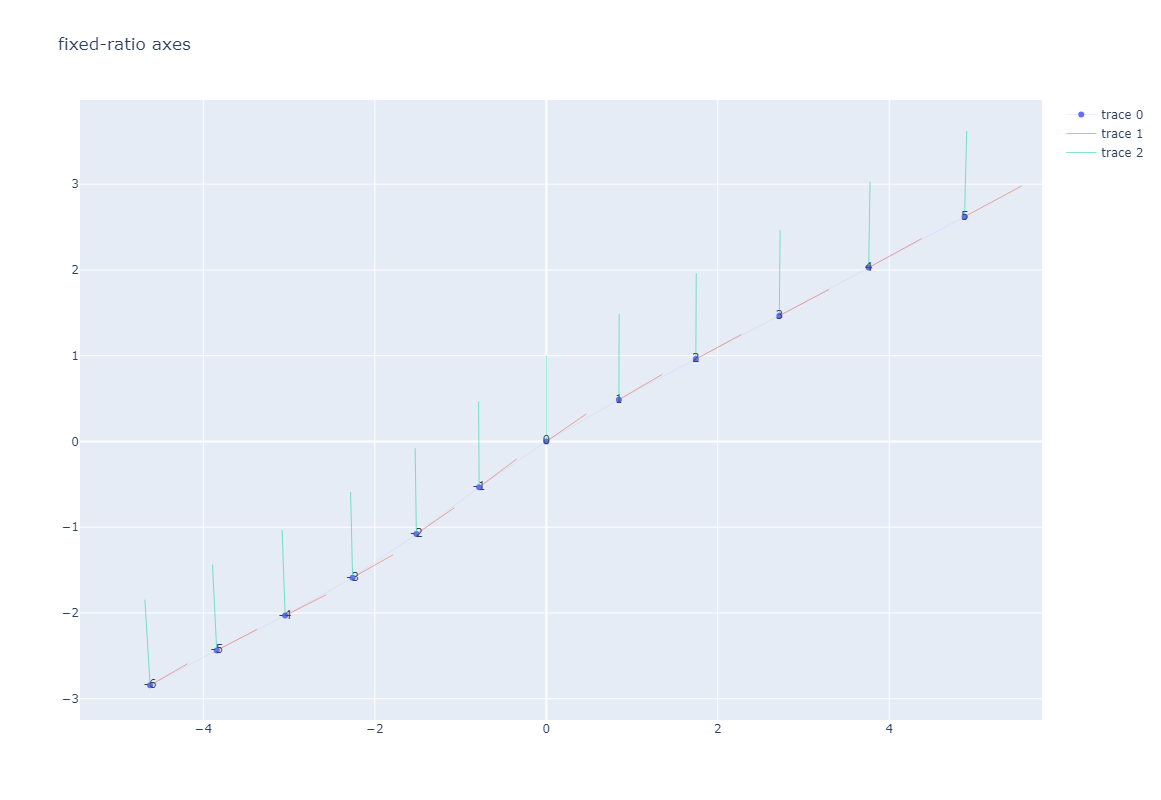

In [67]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=pos_x,
        y=pos_y,
        text=[i-6 for i in range(12)],
        line=dict(
            width=0.1),
        mode="lines+markers+text",

    )
)

fig.add_trace(
    go.Scatter(
        x=plt_velo_x,
        y=plt_velo_y,
        line=dict(
            width=0.5),
        mode="lines",

    )
)

fig.add_trace(
    go.Scatter(
        x=plt_fwd_x,
        y=plt_fwd_y,
        line=dict(
            width=0.5),
        mode="lines",

    )
)

fig.update_layout(
    width = 800,
    height = 800,
    title = "fixed-ratio axes"
)
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )
